# 作业三

## 一、Python类

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class DummyData:
    def __init__(self, num=200):
        self.num = num
        
    def load_data(self, train=True):
        W = [0.3, 2, 1]
        if train:
            X = np.linspace(-2, 2, num=self.num)
            Y = W[0]*X**2 + W[1]*X + W[2] + 0.4*np.random.randn(X.size)
        else:
            X = np.linspace(-10, 10, num=self.num)
            Y = W[0]*X**2 + W[1]*X + W[2] + 5*np.random.randn(X.size)
        return X, Y

In [3]:
X_train, Y_train = DummyData(500).load_data()
X_valid, Y_valid = DummyData(200).load_data(train=False)

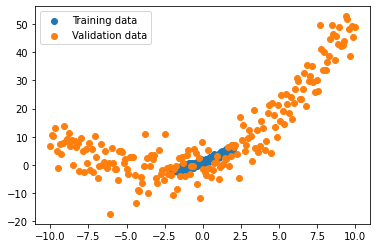

In [4]:
plt.scatter(X_train, Y_train)
plt.scatter(X_valid, Y_valid)
plt.legend(["Training data", "Validation data"])

# 拟合上述曲线

要求：

* 函数$ f(x) = w_0x^2 + w_1x + w_2 $
* 误差采用均方误差 $L := \frac{\sum_{i=1}^{n}(f(X_i) - Y_i)^2}{n}$
* 固定步长的梯度下降法
* 在尽可能不修改代码结构的前提下完成工作
* 利用`X_train, Y_train`拟合，利用`X_valid, Y_valid`来验证拟合的效果

## 定义模型、优化器及误差

In [5]:
class Parabola:
    def __init__(self, step=1e-3):
        self.W = np.zeros(3)
        self.step = step

    def predict(self, X):
        """计算f(X)，X为向量"""
        assert len(X.shape)==1
        # 实现它
        raise(NotImplementedError())
    
    def fit(self, X_train, Y_train, num_iter=1000, verbose=False):
        """利用训练集(X, Y)拟合函数W"""
        for i in range(num_iter):
            X, Y = X_train, Y_train

            Y_out = self.predict(X)
            dLdW = self._grad(X, Y)
            self._update_weight(dLdW)

            if verbose:
                cur_valid_loss = self._loss(Y_valid, self.predict(X_valid))
                cur_train_loss = self._loss(Y, self.predict(X))

                if i%50 == 0:
                    print(f"Iter {i}: train loss {cur_train_loss}, valid loss {cur_valid_loss}")
        
    # 一般来说，如果函数用 _ 开头则表示这个函数是内部实现，随时可以根据需要进行调整（这仅仅只是一个约定）
    # 换句话说，Parabola类只提供两组API: fit, predict
    # API一般会保证一致性 -- 这里使用的是 sklearn 的 API
    def _loss(self, predict, real):
        """计算预测值与真实值之间的误差 L"""
        assert len(real.shape)==1
        assert real.size == predict.size
        # 实现它
        raise(NotImplementedError())

    def _grad(self, X, Y):
        """计算L在X处的关于参数W的导数, 其中Y=f(X)， X、Y均为向量"""
        assert len(X.shape)==1
        # 实现它
        raise(NotImplementedError())
        return dLdW0, dLdW1, dLdW2
    
    def _update_weight(self, dLdW):
        """利用计算出的导数dLdW来更新权重W"""
        # 实现它
        raise(NotImplementedError())

## 拟合模型

In [6]:
model = Parabola()

model.fit(X_train, Y_train, verbose=True)

Iter 0: train loss 7.387469877566412, valid loss 358.1376185737317
Iter 50: train loss 5.192845037696437, valid loss 160.08693537131256
Iter 100: train loss 3.7993227032348904, valid loss 103.14076657264337
Iter 150: train loss 2.8636227125989926, valid loss 96.35787891588102
Iter 200: train loss 2.206729210467262, valid loss 103.37637041458811
Iter 250: train loss 1.730252672620262, valid loss 110.99809060880956
Iter 300: train loss 1.3767076385617047, valid loss 115.41139000402633
Iter 350: train loss 1.1103166870208538, valid loss 116.29870118488779
Iter 400: train loss 0.9074881658744149, valid loss 114.4178955811505
Iter 450: train loss 0.7519132526248361, valid loss 110.679998946516
Iter 500: train loss 0.6319138778040571, valid loss 105.84840700299152
Iter 550: train loss 0.5389207350200598, valid loss 100.48027987355904
Iter 600: train loss 0.46654278936343585, valid loss 94.95087773955072
Iter 650: train loss 0.40996333070662927, valid loss 89.49759155918086
Iter 700: train lo

## 显示结果

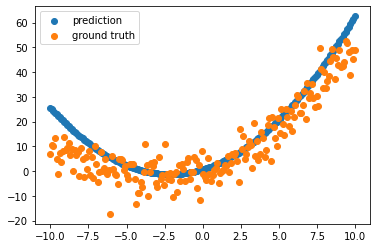

In [7]:
plt.scatter(X_valid, model.predict(X_valid))
plt.scatter(X_valid, Y_valid)
plt.legend(["prediction", "ground truth"])